In [62]:
import sklearn
import numpy as np
from glob import glob
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patmellon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
categories = [ "Mystery", "Drama", "Thriller", "Comedy", "Action"]

In [64]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,text,Mystery,Drama,Thriller,Comedy,Action
0,Arthur Kirkland is a hotheaded but idealistic...,1,1,1,1,0
1,14-year-old Danny O'Neil is madly in love wit...,0,0,0,1,0
2,"The Polish artist Julia and her husband Piotr,...",0,1,0,0,0
3,"The film tells the story of David Vass , an ob...",0,1,0,1,0
4,"Sean Raine, an ex-army officer with issues of ...",1,1,1,0,0


In [65]:
from sklearn.model_selection import train_test_split
train, test = train_test_split("data.csv", random_state=42, test_size=0.20, shuffle=True)

In [66]:
tfidf = TfidfVectorizer()

In [67]:
train, test = train_test_split(pd.read_csv("/Users/patmellon/Desktop/workspace/data-test/data.csv", encoding = "ISO-8859-1"), random_state=42, test_size=0.33, shuffle=True)

In [68]:
X_train = train.text
X_test = test.text
print(X_train.shape)
print(X_test.shape)

(146,)
(72,)


In [69]:
from sklearn.multiclass import OneVsRestClassifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Mystery
Test accuracy is 0.7083333333333334
... Processing Drama
Test accuracy is 0.7777777777777778
... Processing Thriller
Test accuracy is 0.7916666666666666
... Processing Comedy
Test accuracy is 0.5972222222222222
... Processing Action
Test accuracy is 0.5277777777777778


In [70]:
from sklearn.svm import LinearSVC

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Mystery
Test accuracy is 0.75
... Processing Drama
Test accuracy is 0.7916666666666666
... Processing Thriller
Test accuracy is 0.7638888888888888
... Processing Comedy
Test accuracy is 0.6388888888888888
... Processing Action
Test accuracy is 0.5694444444444444


In [71]:
from sklearn.linear_model import LogisticRegression
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Mystery
Test accuracy is 0.7083333333333334
... Processing Drama
Test accuracy is 0.7777777777777778
... Processing Thriller
Test accuracy is 0.7916666666666666
... Processing Comedy
Test accuracy is 0.5972222222222222
... Processing Action
Test accuracy is 0.5


Text(0.5, 0, 'category')

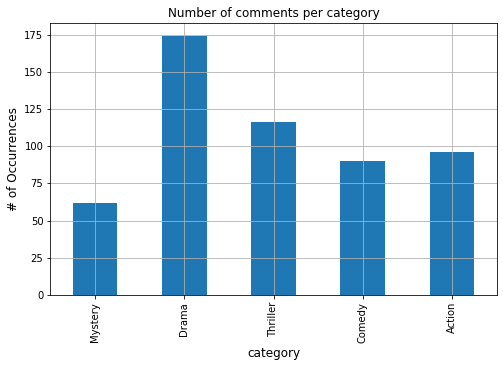

In [72]:
df_labels = df.drop(['text'], axis=1)
counts = []
categories = list(df_labels.columns.values)
for i in categories:
    counts.append((i, df_labels[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_genres'])
df_stats

df_stats.plot(x='category', y='number_of_genres', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)